In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

!conda install -y kagglehub

In [57]:
import kagglehub

path = kagglehub.dataset_download("mohansacharya/graduate-admissions")

file_name = path+'/Admission_Predict.csv'
DF = pd.read_csv(file_name)

show(DF)

In [59]:
DF.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [61]:
DF.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [63]:
DF.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

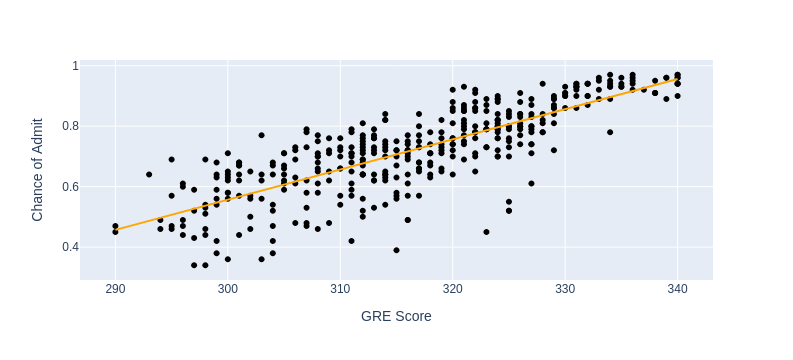

In [65]:
fig = px.scatter(
    DF,
    y='Chance of Admit ',
    x='GRE Score',
    color_discrete_sequence=['black'],
    trendline='ols',
    trendline_color_override='orange'
)

fig.show()

In [81]:
DF_model = DF[['GRE Score', 'Chance of Admit ']]

X = DF_model['GRE Score'].values.reshape(-1,1)
Y = DF_model['Chance of Admit ']

lr = LinearRegression()
lr.fit(X, Y)

print(lr.coef_)
print(lr.intercept_)
print(lr.score(X,Y))

DF_model['predicted'] = DF_model['GRE Score']*lr.coef_ + lr.intercept_

[0.00997588]
-2.436084244851055
0.6441835498438333


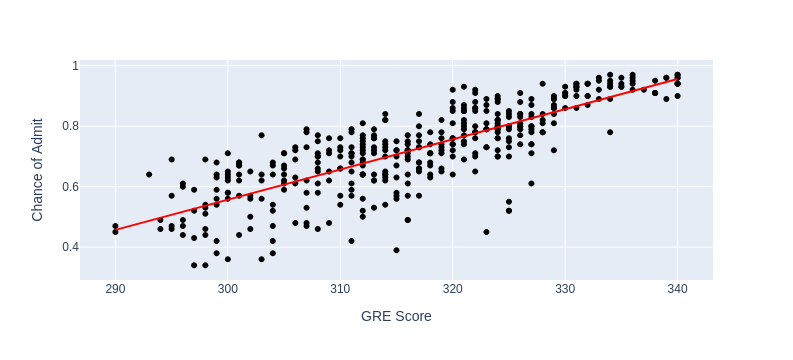

In [93]:
DF_model = DF_model.sort_values('predicted')

fig = px.scatter(
    DF_model,
    y='Chance of Admit ',
    x='GRE Score',
    color_discrete_sequence=['black'],
)

fig.add_trace(
    px.line(DF_model, x='GRE Score', y='predicted', color_discrete_sequence=['red']).data[0])

fig.show()

In [101]:
X_new = np.array([320,300,0,500])
lr.predict(X_new.reshape(-1,1))

array([ 0.756198  ,  0.55668036, -2.43608424,  2.55185677])